# Del 3: Plotting av tidsserier

*Nedbørsoppgavene Del 1 til 5 er laget som støtte-oppgaver til oppgaven "Nedbør i Norge". Oppgaven "Nedbør i Norge" er en lengre oppgave som kommer innom mange forskjellige programerings-elementer. Intensjonen er at hvis man først gjør deloppgavene 1 til 5 og så går gjennom det nokså omfattende eksempelet på starten av oppgaven "Nedbør i Norge" så vil det programeringstekniske i oppgaven "Nedbør i Norge" være repetisjon, slik at man kan fokusere på den naturvitenskaplige tolkningen av dataene. På denne måten får man både trening i programmering og erfaring med hvordan det kan brukes til å studere og forstå naturvitenskaplige prosesser.*

-------------------

Å lage figurer er et av de viktigste verktøyene man har når man skal jobbe med et datasett. Dette gjelder i starten når man prøver å få oversikten over dataene, men også seinere når man skal presentere resultater.

I denne oppgaven skal vi se på tidsserier. Vi kommer også såvidt innom hvordan man bruker dokumentasjonen til funksjonene man bruker. I oppgaven [Figurer](https://github.com/irendundas/EkteData/blob/main/Konseptoppgaver/Figurer.ipynb) er denne oppgaven inkludert sammen med flere andre måter å visualiere data. 


#### Last inn pakkene som trengs

In [25]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer

import sys
# Bytt ut stien under slik at den peker på hvor på din PC du har 
# lagret mappen "Funksjoner".
#sys.path.append(r"W:\Work\Documents\EkteData\EkteData\Funksjoner")
sys.path.append(r"C:\Users\iren_\Documents\EkteData\Funksjoner")
from EkteDataFunk import loadData # for filinnlasting

En av de aller enkleste figurene er et linjeplot. For en funksjon `f(x)` er `x` langs første-aksen, og `f(x)` langs andre-aksen. I dette eksempelet har vi temperatur som en funksjon av tid, så vi får tid langs første-aksen og temperatur langs andre-aksen. 


#### 1. Last inn et datasett
Last inn et datasett å jobbe med. I denne oppgaven bruker vi års-temperatur i Bergen fra 1860 til 2020. Siden funksjonen her er en funksjon av tid er dette en tidsserie. 
I oppgaven [Del2: Rydd Datasett](https://github.com/irendundas/EkteData/blob/main/Level2_Nedb%C3%B8rsoppgaven/Del2_RyddDatasett.ipynb) og [Funksjoner](https://github.com/irendundas/EkteData/blob/main/Konseptoppgaver/Funksjoner.ipynb) er det detaljer på hvordan filinnlastingen fungerer.

In [26]:
file='TempBergenYearlyNonan.txt'
temp,tid = loadData(file)

In [32]:
tid.shape, temp.shape

((160,), (160, 1))

Vi vil at tid og temp skal ha samme dimensjoner. For dette bruker vi `np.squeeze()`. Denne fjerner dimensjoner som er 1.

In [33]:
temp=np.squeeze(temp)

In [35]:
tid.shape, temp.shape

((160,), (160,))

#### 2. Lag en figur 
Vi lagde figurer i både del 1 og 2, men man kan lage veldig mye mer ryddige og informative figurer enn det vi så på i de to delene. Aller helst skal man kunne se på en figur uten caption og ganske lett skjønne hva dataene viser. Men dette forutsetter gode figurer med navn på aksene, tittel, fargekoding av linjer dersom det er flere og "legends" (symbol/fargeforklaring av linjene). 

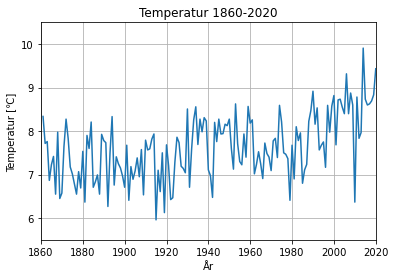

In [36]:
# Først: lag akser å plotte i. Dette er ikke strengt tatt nødvendig for å lage 
# en figur, men gjør at du lettere kan definere størrelsen på figuren, definere
# grid, tekst osv. på ryddig vis som under. 
ax=plt.axes()

# Plot tidsserien
ax.plot(tid, temp)

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=[1860,2020], # Sett grense for x-aksen
    ylim=[5.5,10.5] # Sett grense for y-aksen
) 
ax.grid()  # Legg til rutenett (grid) i bakgrunnen

# Linjen under er kun med så vi slipper unødvendig tekstoutput. Du kan 
# kommentere den ut for å se forskjellen på å ha den med og ikke om du vil. 
plt.show() 

#### 3. Spesifisering av farger, linjestil, markører etc. 

Si at du vil at linjen heller skal være oransje og at alle faktiske datapunkt skal være markert med en grønn femkant. Da ville jeg googlet f.eks. "matplotlib line color python", trykket meg inn på dokumentasjonslinken som kommer opp. I dette tilfellet kommer jeg [hit](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), en av dokumentasjons-sidene til Matplotlib. Ganske tidlig på siden er det noen eksempler på å endre linjefarge og sette markør, men for å finne informasjon om hvordan jeg setter markøren til en femkant og gjøre den grønn må man skrolle lengre ned på siden til man finner "Other Parameters:". Under ** kwargs (keyword arguemts) kommer en lang liste. Kolonnen "Properties" er det vi er ute etter. Dette er alle "keywordene" man kan gi til `plt.plot`, f.eks "color". Måten man bruker dette er f.eks. `plt.plot(tid, temp, color='green')`. Dette gir en grønn linje istedet for en blå. `color='green'` er et "keyword argument pair". For informasjon om hvert enkelt keyword trykker man på lenken deres og finner hvile mulige input de kan få.

**Notat på å bruke dokumentasjon**
Man har mye valgfrihet når man skal lage figurer. Alt av farger, tekststørrelse, figurstørrelse, akser, grenser, verdier/tekst langs aksene og mye mer kan endres. Det enkleste å gjøre når man skal finne ut hvordan man skal endre på noe er å lese dokumentasjon til funksjoner i `matplotlib`, et bibliotek for plotting av figurer i python. Det meste du trenger finnes her. Å lese dokumentasjon er en treningssak. Det kan være overveldende i starten og vanskelig å finne ut hvor i all informasjonen den informasjonen du er på jakt etter finne. Dette blir lettere etterhvert.

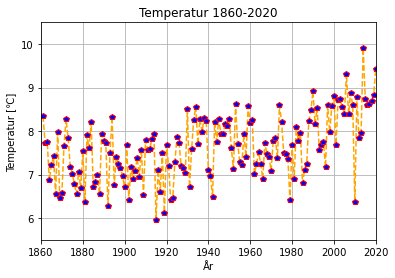

In [37]:
ax=plt.axes()

# Plot tidsserien, og definer hvordan linjen skal se ut
ax.plot(
    tid,temp,
    color='orange', # oransje linje
    marker='p', # stjerne som markør
    markerfacecolor='blue', # blå stjerner
    markeredgecolor='red', # rød kant på den blå stjernene
    linestyle='--' # stiplet linje
)

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=[1860,2020], # sett grense for x-aksen
    ylim=[5.5,10.5] # sett grense for y-aksen
) 
ax.grid() # legg til rutenett (grid) i bakgrunnen
plt.show() 

#### Oppgave 1:
Lag samme figur som over, men bruk røde stjerner med oransje kant som markør og blå linje istedet.

#### Oppgave 2:
Lag samme figur som over, men bruk røde stjerner med oransje kant som markør og ingen linje istedet.

#### Oppgave 3:
Lag samme figur som over, men lag tittlen større. Dette krever et nytt søk i dokumentasjonen. Tips: inkluder "title" og "fontsize" i søkeordene dine. Plot i nye farger, markører og linjestil.

#### 4. Bestem figurstørrelsen
Default-størrelsen til figurene i Python er ikke alltid den beste til å presentere de dataene du vil visualisere. Man vil for eksmepel ofte strekke ut en tidsserie i horisontalen, mens iblant er det viktig at x- og y-aksene har like dimensjoner. Som med alt mulig annet i programmering finnes det mange måter å gjøre dette på, vi viser en måte her. 

**Notat:** I kompliserte figurer kan det være vanskelig å finne et system for når man må bruke f.eks. `ax.` eller `fig.` eller `plt.`. Generelt er det slik at disse knaggene ("handles") hører til ulike akser i figuren. I eksempelet under er f.eks. "fig" hele figurområdet, mens "ax" kun er den aksen det faktisk plottes i. Forskjellen på dette blir tydelig når man har flere panel ("subplots", små figurer) på et stort figurområde. Figuren i bolk 6 er et eksempel på dette.   

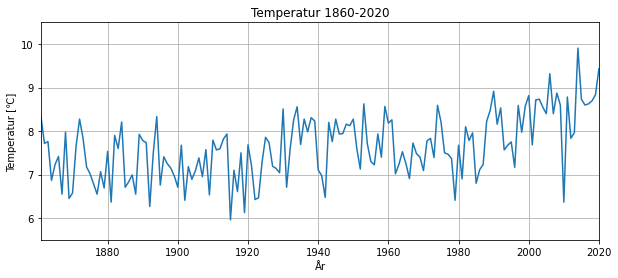

In [38]:
# Sett figur-strørrelsen: 10 enheter langs x-aksen og 4 enheter langs y-aksen.
plt.figure(figsize=(10, 4))
ax=plt.axes()

# Plot tidsserien
ax.plot(tid,temp)

ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=(tid[0],tid[-1]), # sett grense for x-aksen
    ylim=[5.5,10.5] # sett grense for y-aksen
) 
ax.grid()
plt.show()

#### Oppgave 4.
Lag en figur som viser 1925-2000 ved å endre `xlim`, og endre figurstørrelsen til å være høyere og smalere enn den over. 

#### 5. Flere element i ett plot
Ofte har man flere elementer, f.eks., flere linjer i samme plot. Da trenger man informasjon om hva de ulike linjene representerer. For dette bruker vi `plt.legend()`. "legend" er bokser med navn på linjene. Teksten som skal høre til hver linje defineres med "label" for hver linje. 

Man kan f.eks. lage en figur med både tidsserien og gjennomsnittet over hele perioden som en linje. 

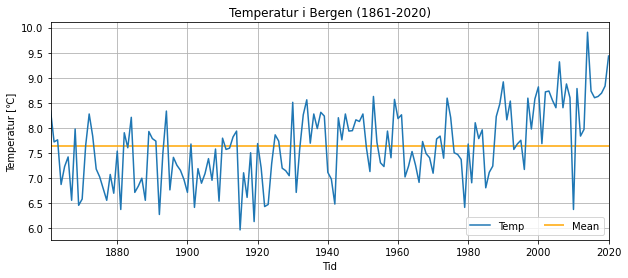

In [39]:
plt.figure(figsize=(10, 4))
ax=plt.axes()

# Lag en variabel "string" med navnene på de to linjene du plotter
string=('Mean','Temp')

# funksjonen hlines lager horisontale linjer: hlines(y, xmin, xmax)
ax.hlines(np.mean(temp), tid[0], tid[-1], label=string[0], color='orange')
ax.plot(tid, temp, label=string[1]) 

ax.set(
    xlim=(1861,2020),
    xlabel='Tid',
    ylabel='Temperatur [\u2103]',
    title='Temperatur i Bergen (1861-2020)'
)

# loc: hvor "legend-boksen" skal plasseres
# ncol: antall kolonner. Her setter jeg ncol=2, så derfor blir et to kolonner i
# "legend-boksen" - en kolonne der det står "mean", og en der det står "Temp".
ax.legend(loc='lower right', ncol=len(string))


plt.grid()

#### Oppgave 5. 
Lag en figur som den over, men plot i tillegg markørene som et eget element. Det skal altså være tre ting i `legend`: "Mean", "Temp", og "Markør". 

#### 6. Vis anomalier
Tenk tilbake til oppgaven om indeksering og rydding av datasettet. Her jobbet vi med hvordan man kunne finne indeksen til elementer basert på et kriterie. Dette er nyttig også her. Det kan for eksempel være veldig illustrativt å plotte punktene over og under gjennomsnittet i ulike farger. Eller for eksempel alt som er over eller under gjennomsnittet pluss/minus standardavviket i klare farger hvis det man er interessert i er ekstremer. 

I figuren under er alle punkter over gjennomsnittet i rødt og alle punktene under i blått. 

In [40]:
# husk tilbake til "logisk indeksering" og vektoren som er True/False som
# man kan bruke til å plukke ut spesifikke verdier (f.eks. -999.99 i 
# oppgaven "rydd datasett")
tid[temp>np.mean(temp)]

array([1861., 1862., 1863., 1868., 1871., 1872., 1873., 1882., 1884.,
       1889., 1890., 1891., 1894., 1901., 1910., 1913., 1914., 1920.,
       1925., 1926., 1930., 1933., 1934., 1935., 1936., 1937., 1938.,
       1939., 1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950.,
       1953., 1954., 1957., 1959., 1960., 1961., 1967., 1971., 1972.,
       1974., 1975., 1980., 1982., 1983., 1984., 1988., 1989., 1990.,
       1991., 1992., 1994., 1995., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.])

In [41]:
# "indH": index of values Higher than mean
indH=temp>np.mean(temp)

# "indL": index of values Lower than mean
indL=temp<np.mean(temp)

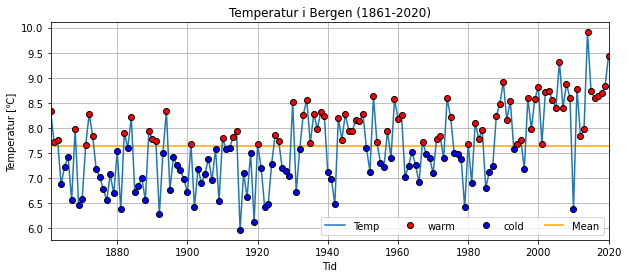

In [45]:
plt.figure(figsize=(10, 4))
ax=plt.axes()

string=('Mean','Temp','warm','cold')

ax.hlines(np.mean(temp), tid[0], tid[-1], label=string[0], color='orange')
ax.plot(tid, temp, label=string[1]) 
ax.plot(
    tid[indH], temp[indH], 
    color='none', marker='o', markerfacecolor='red', label=string[2]
) 
ax.plot(
    tid[indL], temp[indL], 
    color='none', marker='o', markerfacecolor='blue', label=string[3]
) 


ax.set(
    xlim=(1861,2020),
    xlabel='Tid',
    ylabel='Temperatur [\u2103]',
    title='Temperatur i Bergen (1861-2020)'
)

# Her setter jeg ncol=len(string), så derfor blir det fire kolonner i 
# "legend-boksen" - en kolonne for hvert navn i vektoren "string".
ax.legend(loc='lower right', ncol=len(string))


plt.grid()

#### Oppgave 6.
Lag samme figur som over, men marker punktene som er pluss/minus ett standardavvik istedet for over/under gjennomsnittet. *Tips*: Numpy sin funksjon for standardavvik er `np.std()`. 

#### 7. Subplots - flere panel i samme figur
Subplots er nyttig f.eks. hvis man har tidsserier over samme periode for ulike variabler som temperatur, lufttrykk, og nedbør, eller havtemperatur og saltholdighet. 

Vi introduserer ikke et nytt datasett her i denne oppgaven, men plotter samme tidsserie i alle panelene. Linjen `ax = fig.add_subplot(xyz)` bestemmer hvor mange panel det skal være i figuren. `x` er antall rader med panel, `y` er antall kolonner med panel, og `z` er hvilket panel du plotter i akkurat nå.

Numereringen på subplottene starter i øvre venstre hjørne og ender i nedre høyre hjørne. Har man f.eks. `fig.add_subplot(23z)` er `z=1` øverst til venstre, `z=2` på midten øverst, og `z=6` nederst til høyre. 

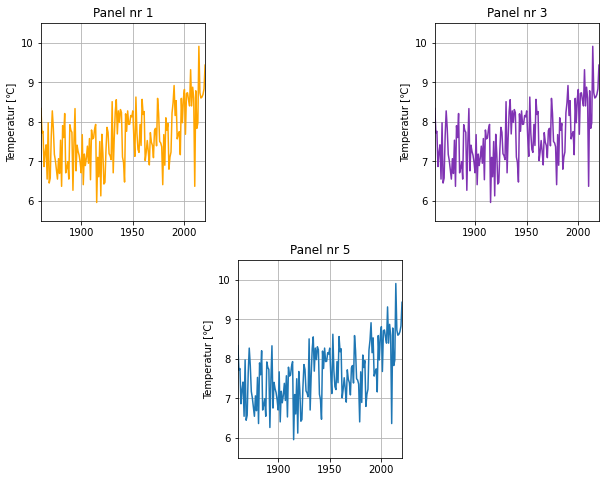

In [51]:
fig=plt.figure(figsize=(10, 8))

#-----Plot i panel nr1--------------------------------------------------------
ax = fig.add_subplot(231) 
ax.plot(tid, temp, color='orange')
ax.set(
    title='Panel nr 1',
    ylabel='Temperatur [\u2103]',
    xlim=(tid[0], tid[-1]), 
    ylim=[5.5, 10.5] 
) 
plt.grid()

#-----Plot i panel nr3-------------------------------------------------------------------------------
ax = fig.add_subplot(233) 
ax.plot(tid, temp, color=[.5, .2, .7])
ax.set(
    title='Panel nr 3',
    ylabel='Temperatur [\u2103]', 
    xlim=(tid[0], tid[-1]), 
    ylim=[5.5, 10.5] 
)
plt.grid()

#-----Plot i panel nr5-------------------------------------------------------------------------------
ax = fig.add_subplot(235) 
ax.plot(tid, temp)
ax.set(
    title='Panel nr 5',
    ylabel='Temperatur [\u2103]',  
    xlim=(tid[0], tid[-1]), 
    ylim=[5.5, 10.5] 
)
plt.grid()
#-------------------------------------------------------------------------------


plt.show()

Man må ikke ha et perfekt grid med subplot slik som over, man kan f.eks. ha tre små panel i øvre rad og et langt panel i nedre rad, men dette krever behandling av aksene, noe vi ikke går gjennom her. Men det er mulig. 

#### Oppgave 7: 
Lag to nye figurer. I den ene figuren, plot alt i listen under i samme figur.  
- hele tidsserien, 
- hvert tiende datapunkt. Se på [oppgaven om indeksering](https://github.com/irendundas/EkteData/blob/main/Level2_Nedb%C3%B8rsoppgaven/Del1_Indeksering.ipynb) for tips. 
- hvert av disse datapunktene +/- standardavviket for hele tidsserien i lysegrå linjer. Numpy sin funksjon for standardavvik er `np.std()`. 

I figur nr 2, plot hele tidserien i et subplot, og resten av punktene i listen over i et annet subplot. 

Husk legend!

In [52]:
# Figur 1

In [53]:
# Figur 2

#### Oppgave 8:
- Hvordan synes du hver tiende datapunkt representerer den originale tidsserien? 
- Holder det å bare plotte hvert tiende datapunkt for å få frem hovedbudskapet? 
- Hvilken informasjon får du ut av linjene med standardavvik?

____________

Det er nok mange ting å forbedre med denne figuren, men to ting skal vi se på i oppgaven om [for-løkker](https://github.com/irendundas/EkteData/blob/main/Level2_Nedb%C3%B8rsoppgaven/Del5_Forl%C3%B8kke.ipynb) og til slutt i hovedoppgaven [Nedbør i Norge](https://github.com/irendundas/EkteData/blob/main/Level2_Nedb%C3%B8rsoppgaven/Nedb%C3%B8rsoppgaven.ipynb). 
- Det ofte er bedre å se på gjennomsnittet av intervaller heller enn en eksempelverdi fra intervallet. I dette eksempelet ville man f.eks. plottet et gjennmonsnitt av hver tiårsperiode heller enn hver tiende verdi. 
- Verdier som standardavviket endrer seg ofte over tid. Derfor er det gjerne mer informativt å plotte standaravvik for intervallet, f.eks. hver tiårsperiode som her, heller enn standardavviket for hele tidsserien. Men for dette må man iterere gjennom tiårs-periodene, og for dette trenger man ofte for-løkker.

